attacker ips: ['0.0.0.0', '25.25.25.25', '51.51.51.51', '76.76.76.76', '102.102.102.102', '127.127.127.127', '153.153.153.153', '178.178.178.178', '204.204.204.204', '229.229.229.229']
attacker ids: ['00000000000000000000', '11111111111111111111', '22222222222222222222', '33333333333333333333', '44444444444444444444', '55555555555555555555', '66666666666666666666', '77777777777777777777', '88888888888888888888', '99999999999999999999']
Generated regular workload in input0.csv


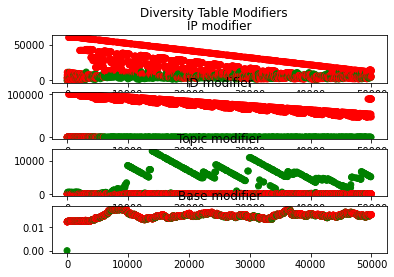

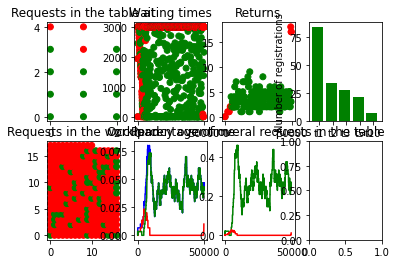

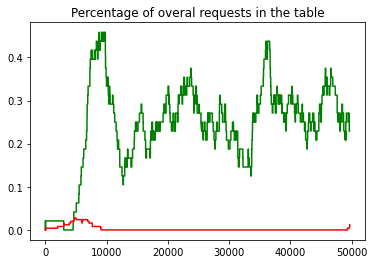

In [1]:
from table import *
import matplotlib.pyplot as plt
from threshold import *
from generate_table_workloads import *
from matplotlib.lines import Line2D
import sys, os
counter = 0
def generate_input_file(attack, seed):
    global honest_size, counter
    filename = 'input' + str(counter) + '.csv'
    if(attack == 'none'):
        generate_regular(size = honest_size, seed=seed, output_filename = filename)
    elif(attack == 'impatient'):
        generate_impatient(size = honest_size, seed=seed, output_filename = filename)
    elif(attack == 'spam'):
        generate_spam_topic(size = honest_size + malicious_size, attacker_ip_num = attacker_ip_id_num, attacker_id_num = attacker_ip_id_num, rate_normal = 1.0, rate_attack = malicious_size/honest_size, seed=seed, output_filename = filename)
    elif(attack == 'topic_popular'):
        generate_attack_topic(size = honest_size + malicious_size, topic_to_attack = 't1', attacker_ip_num = attacker_ip_id_num, attacker_id_num = attacker_ip_id_num, rate_normal = 1.0, rate_attack = malicious_size/honest_size, seed=seed, output_filename = filename)
    elif(attack == 'topic_unpopular'):
        generate_attack_topic(size = honest_size + malicious_size, topic_to_attack = 't12', attacker_ip_num = attacker_ip_id_num, attacker_id_num = attacker_ip_id_num, rate_normal = 1.0, rate_attack = malicious_size/honest_size, seed=seed, output_filename = filename)
    else:
        print("Unknown attack", attack)
        quit(-1)
    counter += 1
    return filename

def restore_default():
    global ad_lifetime, input_file, capacity, honest_size, malicious_size, occupancy_power, ip_id_power, topic_power, base_multiplier, attacker_ip_id_num, attacker_id_num
    ad_lifetime = 3000
    capacity = 300
    honest_size = 50
    malicious_size = 250
    occupancy_power = 5
    ip_id_power = 0.2
    topic_power = 5
    attacker_ip_id_num = 10
    base_multiplier = 40

runtime = 50 * 1000
restore_default()
filename = generate_input_file('spam', seed=1)
sys.stdout = open(os.devnull, 'w')

table = DiversityTable(capacity, ad_lifetime, occupancy_power = occupancy_power, ip_id_power = ip_id_power, topic_power = topic_power, base_multiplier = base_multiplier)
table.load(filename)
table.display(runtime - 1)
table.run(runtime)
plt.show()

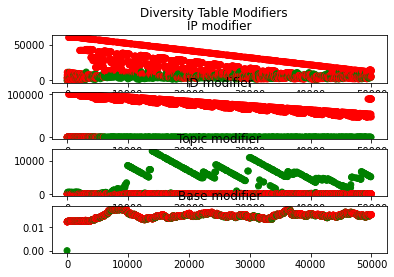

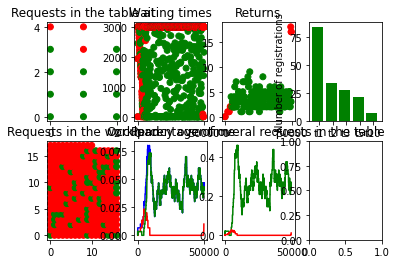

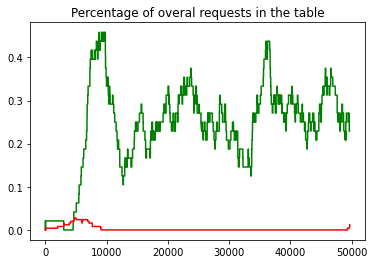

In [2]:
table = DiversityTable(capacity, ad_lifetime, occupancy_power = occupancy_power, ip_id_power = ip_id_power, topic_power = topic_power, base_multiplier = base_multiplier, tree='michal')
table.load(filename)
table.display(runtime - 1)
table.run(runtime)
plt.show()

In [ ]:
table = DiversityTable(capacity, ad_lifetime, occupancy_power = occupancy_power, ip_id_power = ip_id_power, topic_power = topic_power, base_multiplier = base_multiplier, tree='onur')
table.load(filename)
table.display(runtime - 1)
table.run(runtime)
plt.show()